In [2]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

# Data Imports

In [5]:
language = "python"
path_to_lib = f"data/results/{language}"

In [6]:
with open(f"{path_to_lib}/{language}_{language}_daily_post_stats.json") as handle:
    daily_post_count = json.load(handle)

with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
    post_to_libs = json.load(handle)

with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
    libs_count = json.load(handle)
    
with open(f"{path_to_lib}/{language}_pairs_count.json") as handle:
    pairs_count = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
    all_libs_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
    all_pairs_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_libs_first_dates.json") as handle:
    libs_first_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_pairs_first_dates.json") as handle:
    pairs_first_dates = json.load(handle)

# New libs and pairs (y axis) against post count (x axis)

Segments formed (took 2.07 seconds).
Fits performed (took 1.48 seconds).
Fit performed; alpha=0.7726914639879424 c=0.4575875427835869


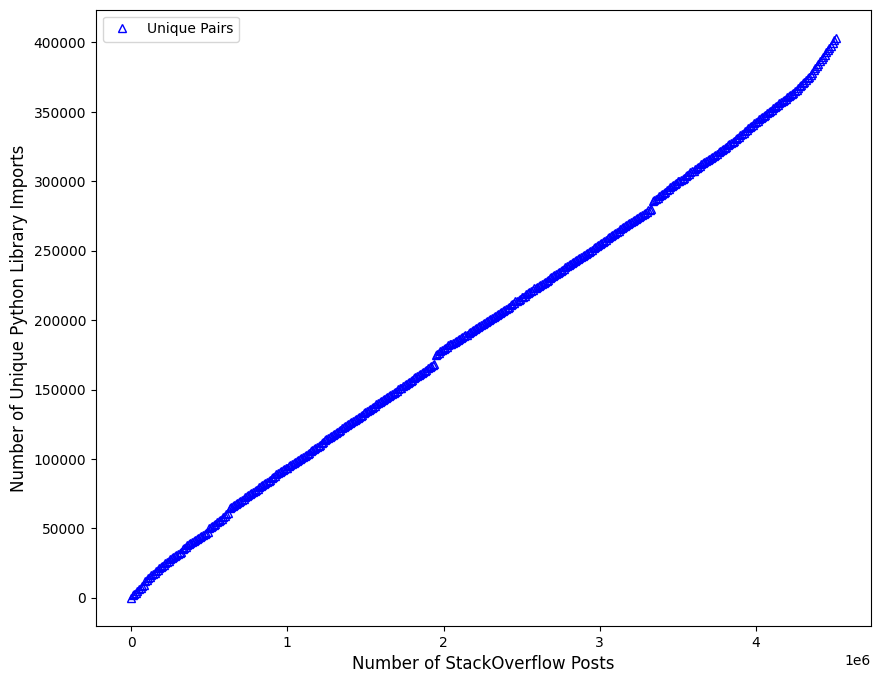

In [20]:
t0 = time.time()
xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
t1 = time.time()
print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")

# Unique libs line fit
libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
t2 = time.time()
print(f"Fits performed (took {round(t2 - t1, 2)} seconds).")

###########################
from sklearn.linear_model import LinearRegression
libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
xs = np.array(range(1, len(libs_count)+1))
xs_transformed = np.log(xs).reshape(-1 ,1 )
counts_transformed = np.log(np.array(libs_count) + 1)

model = LinearRegression()
model.fit(xs_transformed, counts_transformed)

alpha = model.coef_[0]
log_c = model.intercept_
c = np.exp(log_c)
print(f"Fit performed; alpha={alpha} c={c}")
############################


step_size = 10_000
plt.figure(figsize=(10,8))
xs = np.array(range(0, len(xs_libs), step_size))

#xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
#plt.plot(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Unique Libraries")
plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Unique Pairs")

#plt.plot(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (alpha={round(alpha, 2)} c={round(c, 2)})")
#plt.plot(xs, [(c * x ** alpha) * (c * x ** alpha - 1) / 2 for x in xs], "g--", label=f"Heap's Theoretical Upper bound on comb. novelties")

# plt.xticks(fontsize=12)
#plt.title(f"{language.upper()}", fontsize=24)
plt.xlabel("Number of StackOverflow Posts", fontsize=12)
plt.ylabel("Number of Unique Python Library Imports", fontsize=12)

plt.legend()
#plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)

#plt.loglog()

In [21]:
post_to_libs['distinct_libs_plot']

[['2008-08-02T16:56:53.893', 0],
 ['2008-08-02T18:49:07.740', 0],
 ['2008-08-03T01:17:36.393', 0],
 ['2008-08-03T13:19:16.983', 0],
 ['2008-08-03T14:30:50.850', 0],
 ['2008-08-03T15:47:22.100', 0],
 ['2008-08-03T15:59:19.797', 0],
 ['2008-08-03T16:13:29.363', 0],
 ['2008-08-03T18:32:27.693', 0],
 ['2008-08-03T18:40:09.053', 0],
 ['2008-08-03T20:07:05.290', 3],
 ['2008-08-04T02:31:13.250', 4],
 ['2008-08-04T12:00:57.297', 4],
 ['2008-08-04T18:20:36.487', 4],
 ['2008-08-04T18:34:45.520', 4],
 ['2008-08-05T02:39:23.140', 5],
 ['2008-08-05T02:54:54.577', 8],
 ['2008-08-05T03:11:55.570', 9],
 ['2008-08-05T03:27:03.760', 9],
 ['2008-08-05T03:51:57.737', 9],
 ['2008-08-05T03:57:22.327', 9],
 ['2008-08-05T04:13:53.870', 9],
 ['2008-08-05T13:40:47.470', 10],
 ['2008-08-05T13:45:38.413', 10],
 ['2008-08-06T00:33:35.063', 10],
 ['2008-08-06T03:36:08.627', 11],
 ['2008-08-06T03:57:16.820', 11],
 ['2008-08-06T21:00:01.217', 12],
 ['2008-08-07T11:21:56.097', 12],
 ['2008-08-07T11:30:16.047', 12],
 [

# Zip's Law

[]

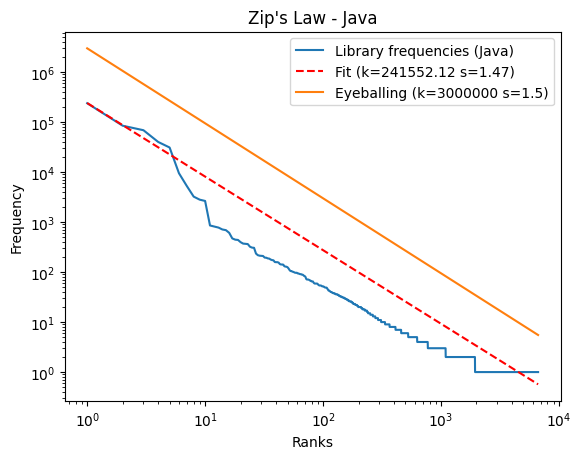

In [112]:
from scipy.optimize import curve_fit

libs_freq = {k:len(v) for k, v in all_libs_dates.items()}
sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

xs = range(1, len(sorted_libs_freq) + 1)
plt.plot(xs, sorted_libs_freq_values, label=f"Library frequencies ({language.capitalize()})")
#plt.loglog()


ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
frequencies = np.array(sorted_libs_freq_values)

def zipf(rank, s, k):
    return k / (rank ** s)

# k / (n ** s)
(s, k), cov = curve_fit(zipf, ranks, frequencies)
fitted_frequencies = zipf(ranks, s, k)
plt.plot(xs, fitted_frequencies, "r--", label=f"Fit (k={round(k, 2)} s={round(s, 2)})")

eye_k = 3_000_000
eye_s = 1.5
plt.plot(xs, [eye_k / (x**eye_s) for x in xs], label=f"Eyeballing (k={eye_k} s={eye_s})")
plt.legend()
plt.xlabel("Ranks")
plt.ylabel("Frequency")
plt.title(f"Zip's Law - {language.capitalize()}")
plt.loglog()

# Urn model for libs 

In [10]:
with open("data/results/python/python_python_code_count_list.json") as handle:
    code_count = json.load(handle)

In [11]:
import os
my_path = "data/results/python/sims/"

[p for p in os.listdir(pathlib.Path(my_path)) if "4500000" in p]


['code_sim_rounds_4500000_bps_441_nei_10_noi_8.json',
 'code_sim_rounds_4500000_bps_442_nei_10_noi_8.json',
 'code_sim_rounds_4500000_bps_439_nei_10_noi_8.json',
 'code_sim_rounds_4500000_bps_440_nei_10_noi_8.json']

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


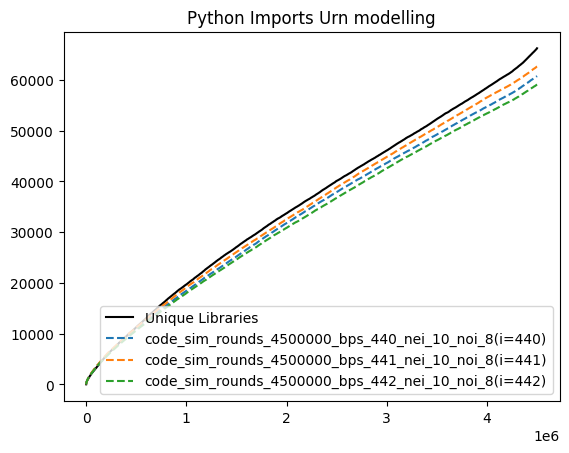

In [12]:
xs = list(range(4500000))
plt.plot(xs, [ys_libs[i] for i in xs],"-", color="black", markerfacecolor='none', label=f"Unique Libraries")

for i in range(440, 443):
    sim_file = f"code_sim_rounds_4500000_bps_{i}_nei_10_noi_8.json"
    with open(f"data/results/python/sims/{sim_file}") as handle:
        sim = json.load(handle)
    #xs = list(range(min(len(ys_libs), len(sim.get("element_counts")))))
    plt.plot(xs, sim.get("element_counts"), "--", label=sim_file.split(".")[0] + f"(i={i})")
plt.title("Python Imports Urn modelling")
plt.legend()

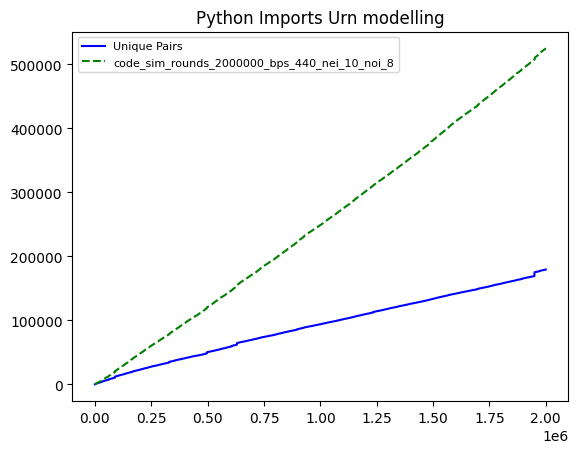

In [22]:
sim_file = "code_sim_rounds_2000000_bps_440_nei_10_noi_8.json"
with open(f"data/results/python/sims/{sim_file}") as handle:
    sim = json.load(handle)

xs = list(range(min(len(ys_libs), len(sim.get("pairs_counts")))))

#plt.plot(xs, [ys_libs[i] for i in xs],"-", color="black", markerfacecolor='none', label="Unique Libraries")
#plt.plot(xs, sim.get("element_counts"), "--", color='red', label=sim_file.split(".")[0])

plt.plot(xs, [ys_pairs[i] for i in xs],"-", color="blue", markerfacecolor='none', label="Unique Pairs")
plt.plot(xs, sim.get("pairs_counts"), "--", color='green', label=sim_file.split(".")[0])
plt.title("Python Imports Urn modelling")
plt.legend(fontsize=8)

In [189]:
len([ys_pairs[i] for i in xs]), len(sim.get("pairs_counts"))

(2000000, 2000000)

/tmp/ipykernel_29815/1871364688.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(range(len(sim.get("pairs_counts"))), np.array(sim.get("pairs_counts"))/ np.array([ys_pairs[i] for i in xs]))


Text(0.5, 1.0, 'Urn model overshot ratio for Python libs')

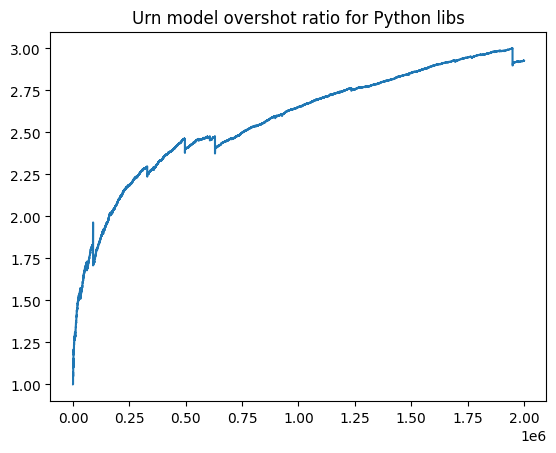

In [193]:
plt.plot(range(len(sim.get("pairs_counts"))), np.array(sim.get("pairs_counts"))/ np.array([ys_pairs[i] for i in xs]))
plt.title("Urn model overshot ratio for Python libs")

# Examine Valuable Novelties

In [40]:
WINDOW_DAYS = 365
VALUE_THRESHOLD_IN_WINDOW = 12

def get_dates_count_in_window(start_date_str: str, dates: list):
    start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
    cnt = 0
    index = 0
    while (
        index < len(dates) and 
        datetime.datetime.strptime(dates[index], "%Y-%m-%d") < start_date + datetime.timedelta(days=WINDOW_DAYS)
    ):
        cnt += 1
        index += 1
    return cnt
    
valuable_libs = set([
    k for k, v in libs_first_dates.items() if
    get_dates_count_in_window(v['date'], all_libs_dates[k]) >= VALUE_THRESHOLD_IN_WINDOW
])
valuable_pairs = set([
    k for k, v in pairs_first_dates.items() if
    get_dates_count_in_window(v['date'], all_pairs_dates[k]) >= VALUE_THRESHOLD_IN_WINDOW
])

In [41]:
def iter_items(parser):
    for prefix, event, value in parser:
        if event == 'string':
            yield prefix, value

loot = {}
date, imports = None, []
with open(f"data/results/{language}/{language}_{language}_post_stats.json") as infile:
    for prefix, event, value in tqdm.tqdm(ijson.parse(infile)):
        if prefix == "item.date":
            date = value
        elif prefix == "item.imports.item":
            imports.append(value)
        elif event == "end_map":
            loot[date] = imports
            date, imports = None, []
        #print(f"prefix: {prefix}, event: {event}, value: {value}")


56008255it [00:38, 1438309.16it/s]


In [42]:
val_xs, val_libs_ys, val_pairs_ys = [], [], []
value_libs_count = 0
value_pairs_count = 0
libs_have_seen = set()
pairs_have_seen = set()
for date, libs in tqdm.tqdm(list(loot.items())):
    # Search for new individual libraries
    value_lib_found = False
    for lib in libs:
        if lib in libs_have_seen:
            continue
        libs_have_seen.add(lib)
        if lib in valuable_libs:
            value_lib_found = True
    if value_lib_found:
        value_libs_count += 1
    
    #Search for new combinations
    value_pair_found = False
    for lib_a, lib_b in itertools.combinations(libs, 2):
        canonical_pair_name = "|".join(sorted([lib_a, lib_b]))
        if canonical_pair_name in pairs_have_seen:
            continue
        pairs_have_seen.add(canonical_pair_name)
        if canonical_pair_name in valuable_pairs:
            value_pair_found = True
    if value_pair_found:
        value_pairs_count += 1

    val_xs.append(date)
    val_libs_ys.append(value_libs_count)
    val_pairs_ys.append(value_pairs_count)


100%|████████████████████████████| 3114958/3114958 [00:02<00:00, 1420411.29it/s]


Segments formed (took 1.2 seconds).


([<matplotlib.axis.XTick at 0x797d60e610f0>,
 [Text(1, 0, '$\\mathdefault{10^{0}}$'),
  Text(10, 0, '$\\mathdefault{10^{1}}$'),
  Text(100, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000, 0, '$\\mathdefault{10^{3}}$'),
  Text(10000, 0, '$\\mathdefault{10^{4}}$'),
  Text(100000, 0, '$\\mathdefault{10^{5}}$'),
  Text(1000000, 0, '$\\mathdefault{10^{6}}$')])

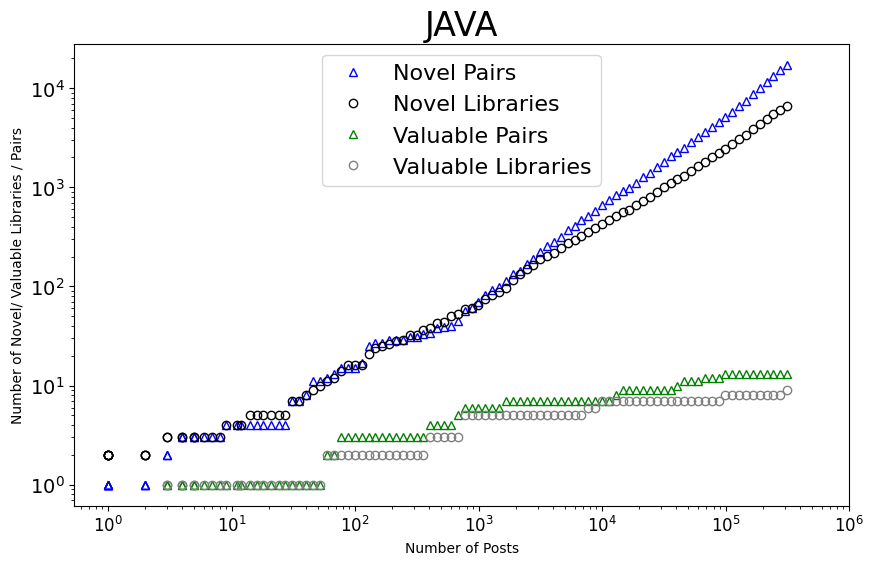

In [43]:
t0 = time.time()
xs_libs_val = np.array(val_xs)
ys_libs_val = np.array(val_libs_ys)
xs_pairs_val = np.array(val_xs)
ys_pairs_val = np.array(val_pairs_ys)
t1 = time.time()
print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")


step_size = 100 #len(xs_libs) // 1000
plt.figure(figsize=(10,6))
xs = np.array(range(0, len(xs_libs), step_size))

xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Novel Pairs")
plt.plot(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Novel Libraries")

plt.plot(xs, [ys_pairs_val[i] for i in xs], "^", color="green", markerfacecolor='none',  label="Valuable Pairs")
plt.plot(xs, [ys_libs_val[i] for i in xs],"o", color="grey", markerfacecolor='none', label="Valuable Libraries")





plt.xticks(fontsize=12)
plt.title(f"{language.upper()}", fontsize=24)
plt.xlabel("Number of Posts", fontsize=10)
plt.ylabel("Number of Novel/ Valuable Libraries / Pairs", fontsize=10)

plt.yticks(fontsize=14)
plt.legend(loc="upper center", fontsize=16)


plt.loglog()

plt.xticks(ticks=[10**i for i in range(0, 7)], fontsize=12)

# Post count, lib count, pair count (y axis) against time (x axis)

In [25]:
print(len(libs_first_dates.keys()), len(all_libs_dates.keys()))
print(libs_first_dates.keys() == all_libs_dates.keys())
for k in list(libs_first_dates.keys())[:10]:
    print(f"{libs_first_dates[k]} <-> {all_libs_dates[k][0]}")

66498 66498
True
{'id': '802', 'poster_id': '1384652', 'date': '2008-08-03'} <-> 2008-08-03
{'id': '802', 'poster_id': '1384652', 'date': '2008-08-03'} <-> 2008-08-03
{'id': '802', 'poster_id': '1384652', 'date': '2008-08-03'} <-> 2008-08-03
{'id': '982', 'poster_id': '200', 'date': '2008-08-04'} <-> 2008-08-04
{'id': '1829', 'poster_id': '30', 'date': '2008-08-05'} <-> 2008-08-05
{'id': '1840', 'poster_id': '116', 'date': '2008-08-05'} <-> 2008-08-05
{'id': '1840', 'poster_id': '116', 'date': '2008-08-05'} <-> 2008-08-05
{'id': '1840', 'poster_id': '116', 'date': '2008-08-05'} <-> 2008-08-05
{'id': '1852', 'poster_id': '116', 'date': '2008-08-05'} <-> 2008-08-05
{'id': '2311', 'poster_id': '394', 'date': '2008-08-05'} <-> 2008-08-05


In [6]:
def get_time_buckets(start, end, default_value=0):
    time_buckets = {}
    runner = datetime.datetime(*[int(item) for item in start.split("-")])
    delta = datetime.timedelta(days=1)
    while runner < datetime.datetime(*[int(item) for item in end.split("-")]):
        time_buckets[runner.strftime("%Y-%m-%d")] = default_value
        runner += delta
    return time_buckets

In [7]:
start = "2008-1-1"
end =  "2024-1-1"


xs = list(get_time_buckets(start, end).keys())

libs_buckets = get_time_buckets(start, end)
for v in libs_first_dates.values():
    libs_buckets[v["date"]] += 1
libs_ys = list(pd.Series(libs_buckets).cumsum())

pairs_buckets = get_time_buckets(start, end)
for v in pairs_first_dates.values():
    pairs_buckets[v["date"]] += 1
pairs_ys = list(pd.Series(pairs_buckets).cumsum())

post_counts_buckets =  get_time_buckets(start, end)
post_counts_buckets.update({
    k: v for k, v in daily_post_count.items() if
    datetime.datetime.strptime(start, "%Y-%m-%d") <= datetime.datetime.strptime(k, "%Y-%m-%d") < datetime.datetime.strptime(end, "%Y-%m-%d")
})
post_counts_ys = list(pd.Series(post_counts_buckets).cumsum())

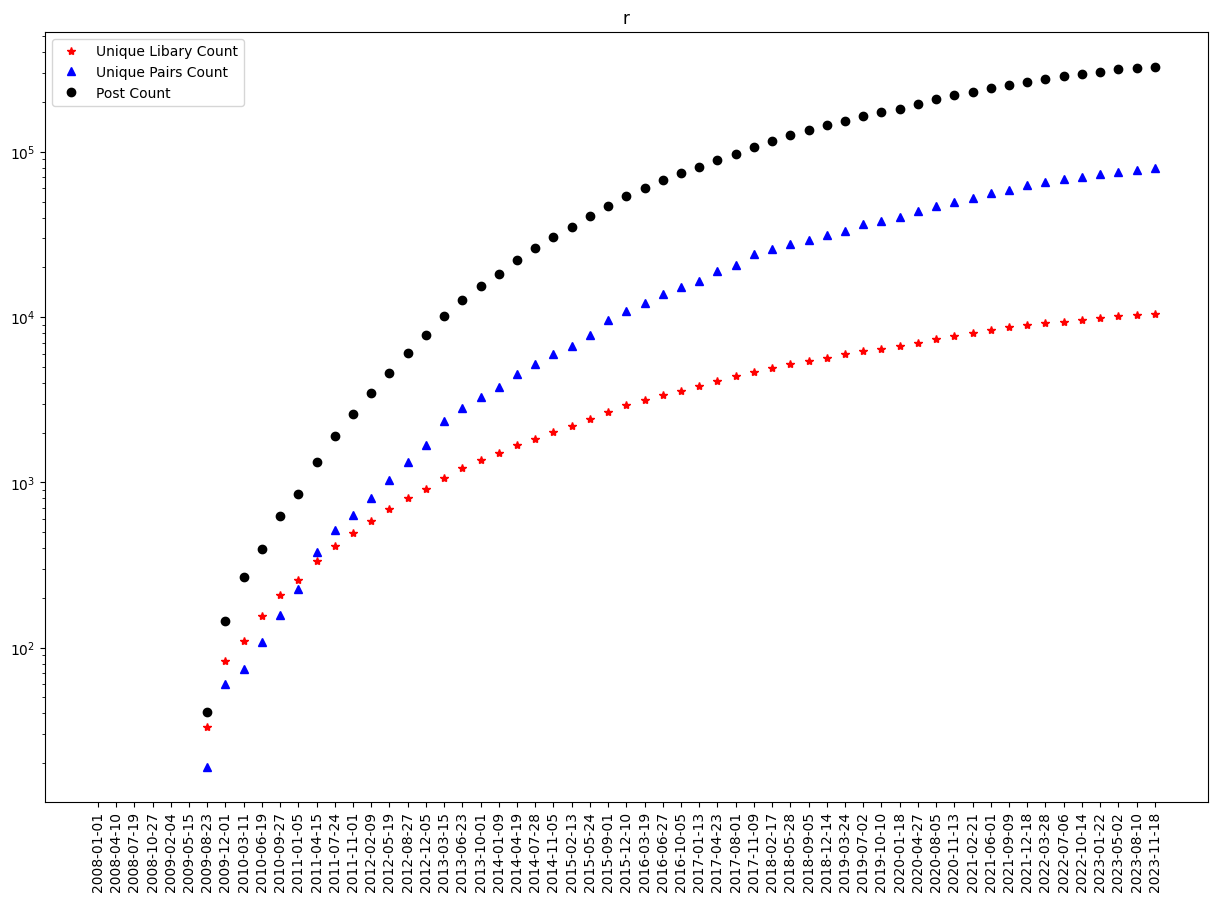

In [8]:
step_size = 100

plt.figure(figsize=(15,10))

plt.plot(xs[::step_size], libs_ys[::step_size], "r*", label="Unique Libary Count")
plt.plot(xs[::step_size], pairs_ys[::step_size], "b^", label="Unique Pairs Count")
plt.plot(xs[::step_size], post_counts_ys[::step_size], "ko", label="Post Count")
plt.title(language)
plt.xticks(rotation=90)
plt.semilogy()
plt.legend(loc="upper left")

# Frequency of libs spread across the years (x axis)

In [9]:
start = "2008-1-1"
end =  "2024-1-1"
delta = datetime.timedelta(days=365)
rolling_window = 30

xs = list(get_time_buckets(start, end))

scatters_x, scatters_y = [],  []
avg = collections.defaultdict(list)
# only checking number of uses in the year following the first appearance
for lib_name, first_appeared in tqdm.tqdm(libs_first_dates.items()):
    first_appeared_dt = datetime.datetime.strptime(first_appeared["date"], "%Y-%m-%d")
    usage_cnt = len(
        [dt for dt in all_libs_dates[lib_name]
         if first_appeared_dt <= datetime.datetime.strptime(dt, "%Y-%m-%d")  < first_appeared_dt + delta]
    )
    scatters_x.append(first_appeared_dt)
    scatters_y.append(usage_cnt)
    avg[first_appeared_dt.strftime("%Y-%m-%d")].append(usage_cnt)

df = pd.DataFrame(avg.items(), columns=['dates', 'counts'])
df['dates_dt'] = df.dates.apply(lambda dt: datetime.datetime.strptime(dt, "%Y-%m-%d"))
df['averages'] = df.counts.apply(lambda row: sum(row) / len(row))
df['roller'] = df.averages.rolling(rolling_window).mean()


100%|█| 10478/10478 [00:02<00:00, 3


[]

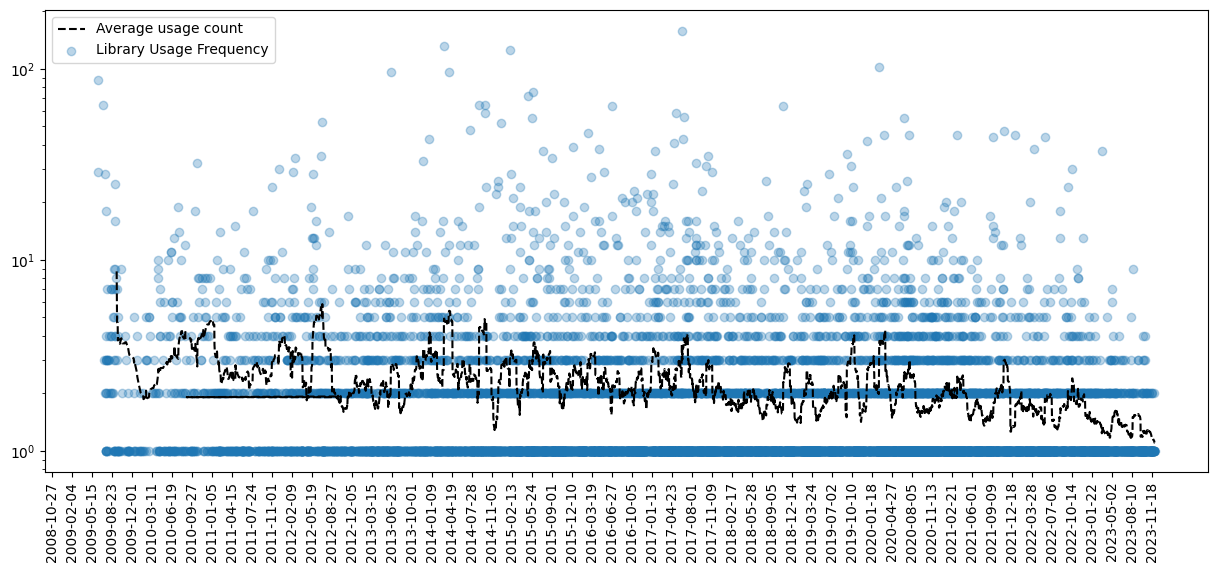

In [10]:
plt.figure(figsize=(15,6))
plt.plot(list(df.dates_dt),list(df.roller), "k--", label="Average usage count")
plt.scatter(scatters_x, scatters_y, alpha=0.3, label="Library Usage Frequency")
plt.xticks(xs[::100], rotation=90)
plt.legend(loc="upper left")
plt.semilogy()


# Number of posts/libs by individuals

In [25]:
with open(f"data/results/python/python_python_post_stats.json") as handle:
    post_count = json.load(handle)

In [36]:
posts_with_imports = [item for item in post_count if item.get("imports") and item.get("poster_id")]

In [44]:
import collections

user_to_imports = collections.defaultdict(set)
user_to_posts = collections.defaultdict(int)
for item in tqdm.tqdm(posts_with_imports):
    user = item.get("poster_id")
    for imp_ in item.get("imports"):
        user_to_imports[user].add(imp_)
    user_to_posts[user] += 1

user_to_import_count = {k:len(v) for k, v in user_to_imports.items()}

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1496348/1496348 [00:02<00:00, 547427.29it/s]


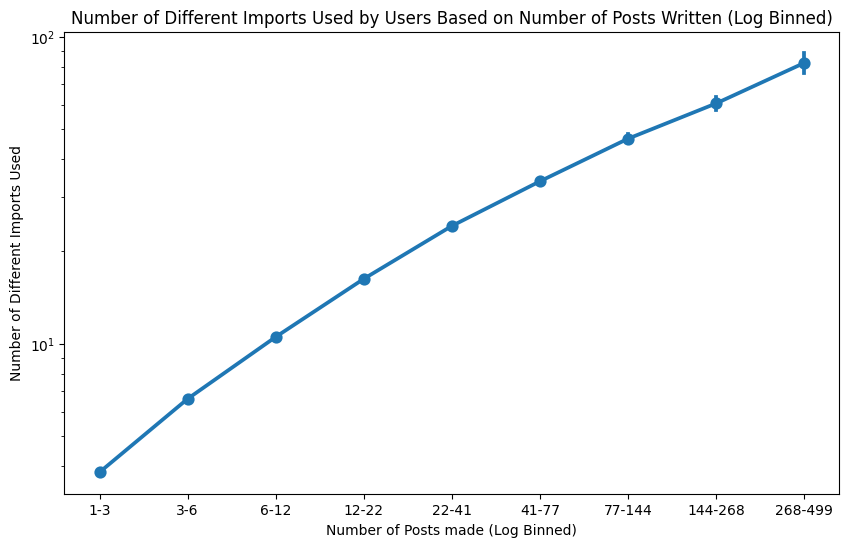

In [54]:
import pandas as pd
import seaborn as sns

# Prepare the data for plotting
data = {
    'User': list(user_to_posts.keys()),
    'Posts': [user_to_posts[user] for user in user_to_posts],
    'ImportCount': [user_to_import_count[user] for user in user_to_import_count]
}

df = pd.DataFrame(data)

# Create logarithmic bins for the number of books
bins = np.logspace(0, np.log10(500), num=11)  # Log bins up to 500
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
df['PostsBin'] = pd.cut(df['Posts'], bins=bins, labels=labels)

# Use sns.pointplot to visualize the binned data
plt.figure(figsize=(10, 6))
sns.pointplot(x='PostsBin', y='ImportCount', data=df)
plt.xlabel("Number of Posts made (Log Binned)")
plt.ylabel("Number of Different Imports Used")
plt.title("Number of Different Imports Used by Users Based on Number of Posts Written (Log Binned)")
#plt.xlim(0, 500)
#plt.ylim(0, 500)
plt.semilogy()
plt.show()

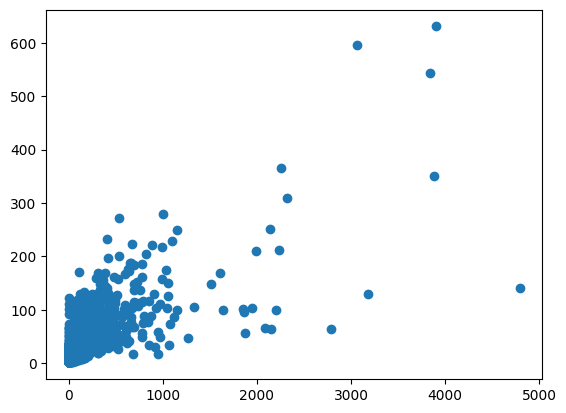

In [53]:
xs = [user_to_posts[user] for user in sorted(user_to_posts.keys())]
ys = [user_to_import_count[user] for user in sorted(user_to_import_count.keys())]
plt.scatter(xs, ys)

In [58]:
import json
with open("python_imports_binned.json", "w") as handle:
    json.dump(data, handle)

In [57]:
pwd

'/home/debian/gabe/SO_Post_Analyzer'